## Cinnamon prices

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import numpy as np
import pandas as pd

### Importing the dataset

In [3]:
# Importing the dataset
url = "/content/drive/MyDrive/Cinnex/Data/cinnamon_price_dataset.csv"
data = pd.read_csv(url, encoding='latin-1')
data.head()

,ID,Year,Month,Region,Cinnamon Grade,Rainfall (mm),Temperature (Â°C),Harvest Season,Processing Cost (LKR/kg),Global Price (USD/tonne),Export Volume (tons),Local Demand (tons),Currency Rate (LKR/USD),Fuel Price (LKR/L),Pest Reports,Govt Policy Changes,Cinnomon Price(LKR/kg)
0,1,2021,September,Mannar,Mexican,86,29,1,122,11277,238,117,378.84,346,0,0,1602
1,2,2022,March,Matale,Hamburg,55,27,1,105,11420,251,85,379.22,356,0,1,1624
2,3,2020,September,Polonnaruwa,C5,70,34,0,101,12376,222,104,376.46,342,1,0,2312
3,4,2022,February,Colombo,Mexican,64,26,1,127,11695,288,96,379.15,359,0,0,1957
4,5,2022,February,Badulla,C5,92,33,0,123,11514,249,140,381.15,359,0,0,2229


### Data plot

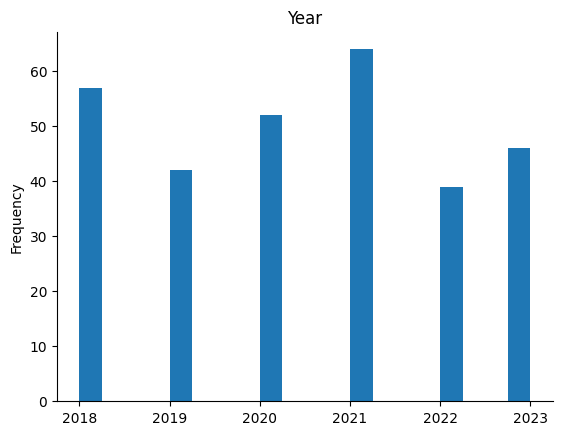

In [5]:
# Year
from matplotlib import pyplot as plt
data['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

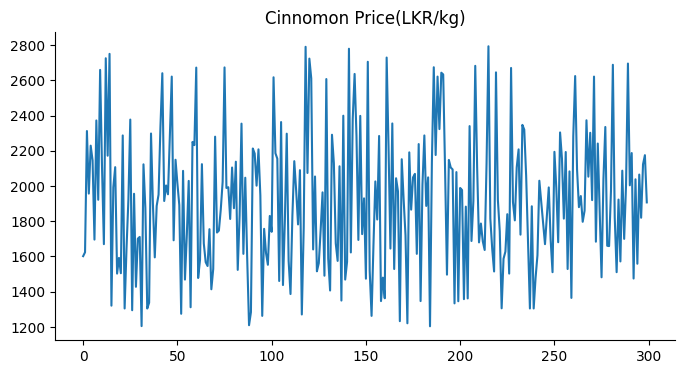

In [7]:
# Price

from matplotlib import pyplot as plt
data['Cinnomon Price(LKR/kg)'].plot(kind='line', figsize=(8, 4), title='Cinnomon Price(LKR/kg)')
plt.gca().spines[['top', 'right']].set_visible(False)

## Data Preprocessing

In [8]:
data.shape

(300, 17)

In [9]:
data.isnull().sum()

,0
ID,0
Year,0
Month,0
Region,0
Cinnamon Grade,0
Rainfall (mm),0
Temperature (Â°C),0
Harvest Season,0
Processing Cost (LKR/kg),0
Global Price (USD/tonne),0


In [10]:
data.info() # check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        300 non-null    int64  
 1   Year                      300 non-null    int64  
 2   Month                     300 non-null    object 
 3   Region                    300 non-null    object 
 4   Cinnamon Grade            300 non-null    object 
 5   Rainfall (mm)             300 non-null    int64  
 6   Temperature (Â°C)         300 non-null    int64  
 7   Harvest Season            300 non-null    int64  
 8   Processing Cost (LKR/kg)  300 non-null    int64  
 9   Global Price (USD/tonne)  300 non-null    int64  
 10  Export Volume (tons)      300 non-null    int64  
 11  Local Demand (tons)       300 non-null    int64  
 12  Currency Rate (LKR/USD)   300 non-null    float64
 13  Fuel Price (LKR/L)        300 non-null    int64  
 14  Pest Repor

In [11]:
data['Region'].value_counts()

,count
Region,
Polonnaruwa,19
Colombo,18
Kilinochchi,16
Matara,15
Ampara,14
Galle,14
Monaragala,13
Puttalam,13
Vavuniya,13


In [12]:
data['Year'].value_counts()

,count
Year,
2021,64
2018,57
2020,52
2023,46
2019,42
2022,39


In [13]:
data['Month'].value_counts()

,count
Month,
January,35
March,32
October,32
December,30
May,27
July,25
April,24
September,21
February,21


In [14]:
len(data['Month'].value_counts())

12

### One-Hot Encoding

In [15]:
data = pd.get_dummies(data)
data.head(2)
data.shape

(300, 62)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 62 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        300 non-null    int64  
 1   Year                      300 non-null    int64  
 2   Rainfall (mm)             300 non-null    int64  
 3   Temperature (Â°C)         300 non-null    int64  
 4   Harvest Season            300 non-null    int64  
 5   Processing Cost (LKR/kg)  300 non-null    int64  
 6   Global Price (USD/tonne)  300 non-null    int64  
 7   Export Volume (tons)      300 non-null    int64  
 8   Local Demand (tons)       300 non-null    int64  
 9   Currency Rate (LKR/USD)   300 non-null    float64
 10  Fuel Price (LKR/L)        300 non-null    int64  
 11  Pest Reports              300 non-null    int64  
 12  Govt Policy Changes       300 non-null    int64  
 13  Cinnomon Price(LKR/kg)    300 non-null    int64  
 14  Month_Apri

## Model Building

In [17]:
X = data.drop('Cinnomon Price(LKR/kg)', axis=1)
y = data['Cinnomon Price(LKR/kg)']

In [39]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        300 non-null    int64  
 1   Year                      300 non-null    int64  
 2   Rainfall (mm)             300 non-null    int64  
 3   Temperature (Â°C)         300 non-null    int64  
 4   Harvest Season            300 non-null    int64  
 5   Processing Cost (LKR/kg)  300 non-null    int64  
 6   Global Price (USD/tonne)  300 non-null    int64  
 7   Export Volume (tons)      300 non-null    int64  
 8   Local Demand (tons)       300 non-null    int64  
 9   Currency Rate (LKR/USD)   300 non-null    float64
 10  Fuel Price (LKR/L)        300 non-null    int64  
 11  Pest Reports              300 non-null    int64  
 12  Govt Policy Changes       300 non-null    int64  
 13  Month_April               300 non-null    bool   
 14  Month_Augu

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train.shape, X_test.shape

((225, 61), (75, 61))

### Model accuracy test

In [19]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> '+ str(acc))

### Algorithms

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
ls = Lasso()
model_acc(ls)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() --> 0.7562353693978777
Lasso() --> 0.7730680602963886
DecisionTreeRegressor() --> 0.5786848208967266
RandomForestRegressor() --> 0.7802588551326578


In [21]:
# Use Random Forest Regressor

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [10, 50, 100],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit

RandomForestRegressor(criterion='poisson', n_estimators=50)

In [22]:
best_fit.score(X_train, y_train)

0.9727419361310314

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions from the best_fit model
predictions = best_fit.predict(X_test) # This line is added

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 31641.50772266666
Root Mean Squared Error (RMSE): 177.88059962420485
R-squared (R2): 0.7854748979767955


### Save Model

In [24]:
import pickle
import os

path = '/content/drive/MyDrive/Cinnex/'

file_path = os.path.join(path, 'predictor1.pickle')
with open('predictor1.pickle', 'wb') as file:
    pickle.dump(best_fit, file)

In [25]:
X_train.columns

Index(['ID', 'Year', 'Rainfall (mm)', 'Temperature (Â°C)', 'Harvest Season',
       'Processing Cost (LKR/kg)', 'Global Price (USD/tonne)',
       'Export Volume (tons)', 'Local Demand (tons)',
       'Currency Rate (LKR/USD)', 'Fuel Price (LKR/L)', 'Pest Reports',
       'Govt Policy Changes', 'Month_April', 'Month_August', 'Month_December',
       'Month_February', 'Month_January', 'Month_July', 'Month_June',
       'Month_March', 'Month_May', 'Month_November', 'Month_October',
       'Month_September', 'Region_Ampara', 'Region_Anuradhapura',
       'Region_Badulla', 'Region_Batticaloa', 'Region_Colombo', 'Region_Galle',
       'Region_Gampaha', 'Region_Hambantota', 'Region_Jaffna',
       'Region_Kalutara', 'Region_Kandy', 'Region_Kegalle',
       'Region_Kilinochchi', 'Region_Kurunegala', 'Region_Mannar',
       'Region_Matale', 'Region_Matara', 'Region_Monaragala',
       'Region_Mullaitivu', 'Region_Nuwara Eliya', 'Region_Polonnaruwa',
       'Region_Puttalam', 'Region_Ratnapura'

## Production

### Testing

#### Import necessary libraries

In [27]:
import pickle
import pandas as pd

#### Load the saved model

In [28]:
model_path = '/content/predictor1.pickle'  # Update path
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

#### Prepare test data

In [29]:
# Prepare test data
def prepare_test_data(test_data, training_data_columns):

  # 1. One-hot encoding
  categorical_cols = ['Region', 'Month', 'Year']
  test_data = pd.get_dummies(test_data, columns=categorical_cols)

  # 2. Column alignment with training data
  test_data = test_data.reindex(columns=training_data_columns, fill_value=0)

  # 3. Drop the target variable (if present)
  X_test = test_data.drop('Cinnamon Price (LKR)', axis=1, errors='ignore') # errors='ignore' to avoid error if column doesn't exist

  return X_test

# Assuming test data is in a CSV file:
test_data = pd.read_csv('/content/drive/MyDrive/Cinnex/Data/cinnamon_price_dataset.csv')
# If test data is already a pandas DataFrame, you can skip the CSV reading step.

# Prepare the test data
X_test_prepared = prepare_test_data(test_data, X_train.columns) # Assuming X_train from your training code

# Make predictions
predictions = loaded_model.predict(X_test_prepared)

In [32]:
import random

# Assuming 'data' is your DataFrame
num_random_samples = 5  # Choose the number of random samples you want

random_indices = random.sample(range(len(data)), num_random_samples)

for index in random_indices:
    random_row = data.iloc[index]
    price = random_row['Cinnomon Price(LKR/kg)']
    print(f"Random Index: {index}, Cinnamon Price: {price}")

Random Index: 248, Cinnamon Price: 1694
Random Index: 107, Cinnamon Price: 1803
Random Index: 212, Cinnamon Price: 1686
Random Index: 262, Cinnamon Price: 2095
Random Index: 50, Cinnamon Price: 2014


#### Make predictions

In [33]:
predictions = loaded_model.predict(X_test)

#### Evaluate the predictions

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 31641.50772266666
R-squared: 0.7854748979767955


### FAST API

In [39]:
import pickle
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the model
model_path = '/content/predictor1.pickle'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()  # Assuming input data is sent as JSON
    # Preprocess the data if needed (e.g., one-hot encoding)
    prediction = model.predict(data)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [36]:
import pickle
import os

path = '/content/drive/MyDrive/Cinnex/'

# Use os.path.join to create the full file path
file_path = os.path.join(path, 'predictor1.pickle')

# Save the model to the specified path
with open(file_path, 'wb') as file:
    pickle.dump(best_fit, file)